In [1]:
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d
import scipy.stats as stats
import pandas as pd
sns.set()

# Zad 1

In [2]:
## dane
alpha_list=[0.01,0.05]
sigma_list=[0.01,0.5,1]
beta0=2
beta1=4
steps=1000

In [3]:
n_list=np.arange(100,10100,100)
rows=[]

results = {alpha: {sigma: {"p_left": [], "p_right": []} for sigma in sigma_list} for alpha in alpha_list}

for n in n_list:
    x=np.linspace(0,10,n)
    x_mean=np.mean(x)
    x_cr=x-x_mean
    sum_x_=np.sum(x_cr**2)

    for alpha in alpha_list:
        normal_prob=stats.norm.ppf(1-alpha/2)
        for sigma in sigma_list:
            p_left=0
            p_right=0
            for _ in range(steps):
                y=beta0+beta1*x+np.random.normal(0,sigma,n)
                y_mean=np.mean(y)
                beta1_hat=np.sum(x_cr*(y-y_mean))/sum_x_
                beta0_hat=y_mean-beta1_hat*x_mean

                comm=normal_prob*sigma
                a=beta0_hat-comm*np.sqrt(1/n+x_mean**2/sum_x_)
                b=beta0_hat+comm*np.sqrt(1/n+x_mean**2/sum_x_)
                c=beta1_hat-comm/np.sqrt(sum_x_)
                d=beta1_hat+comm/np.sqrt(sum_x_)

                p_left+=(a<=beta0<=b)
                p_right+=(c<=beta1<=d)
                
            results[alpha][sigma]["p_left"].append(p_left / steps)
            results[alpha][sigma]["p_right"].append(p_right / steps)

KeyboardInterrupt: 

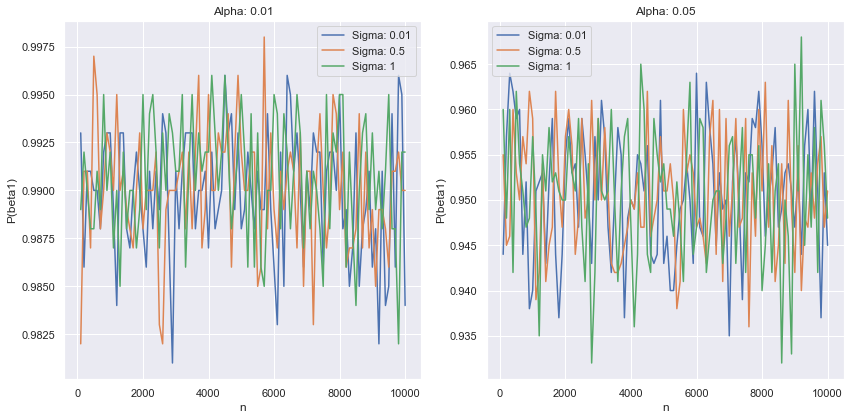

In [ ]:
fig, axs = plt.subplots(1, len(alpha_list), figsize=(12, 6))

for i, alpha in enumerate(alpha_list):
    ax = axs[i]
    for sigma in sigma_list:
        ax.plot(n_list, results[alpha][sigma]["p_right"], label=f"Sigma: {sigma}")
    ax.set_title(f"Alpha: {alpha}")
    ax.set_xlabel("n")
    ax.set_ylabel("P(beta1)")
    ax.legend()

plt.tight_layout()
plt.show()


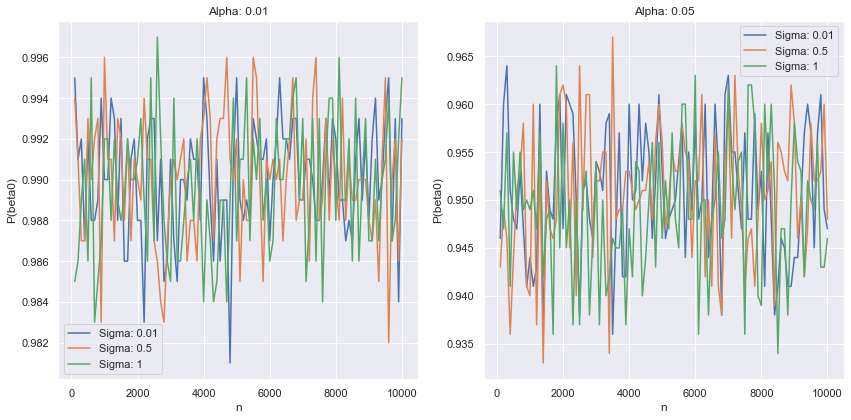

In [ ]:
fig, axs = plt.subplots(1, len(alpha_list), figsize=(12, 6))

for i, alpha in enumerate(alpha_list):
    ax = axs[i]
    for sigma in sigma_list:
        ax.plot(n_list, results[alpha][sigma]["p_left"], label=f"Sigma: {sigma}")
    ax.set_title(f"Alpha: {alpha}")
    ax.set_xlabel("n")
    ax.set_ylabel("P(beta0)")
    ax.legend()

plt.tight_layout()
plt.show()


# Zad 2

In [ ]:
results2 = {alpha: {sigma: {"p_left": [], "p_right": []} for sigma in sigma_list} for alpha in alpha_list}

for alpha in alpha_list:
    for n in n_list:
        x=np.random.uniform(0,1,n)
        x_mean=np.mean(x)
        x_cr=x-x_mean
        sum_x_=np.sum(x_cr**2)
        student_prob=stats.t.ppf(1-alpha/2,n-2)
        for sigma in sigma_list:
            p_left=0
            p_right=0
            for _ in range(steps):
                y=beta0+beta1*x+np.random.normal(0,sigma,n)
                y_mean=np.mean(y)
                beta1_hat=np.sum(x_cr*(y-y_mean))/sum_x_
                beta0_hat=y_mean-beta1_hat*x_mean

                s=np.sqrt(np.sum((y-beta0_hat-beta1_hat*x)**2)/(n-2))
                comm=student_prob*s
                a=beta0_hat-comm*np.sqrt(1/n+x_mean**2/sum_x_)
                b=beta0_hat+comm*np.sqrt(1/n+x_mean**2/sum_x_)
                c=beta1_hat-comm/np.sqrt(sum_x_)
                d=beta1_hat+comm/np.sqrt(sum_x_)

                p_left+=(a<=beta0<=b)
                p_right+=(c<=beta1<=d)
                
            results2[alpha][sigma]["p_left"].append(p_left / steps)
            results2[alpha][sigma]["p_right"].append(p_right / steps)

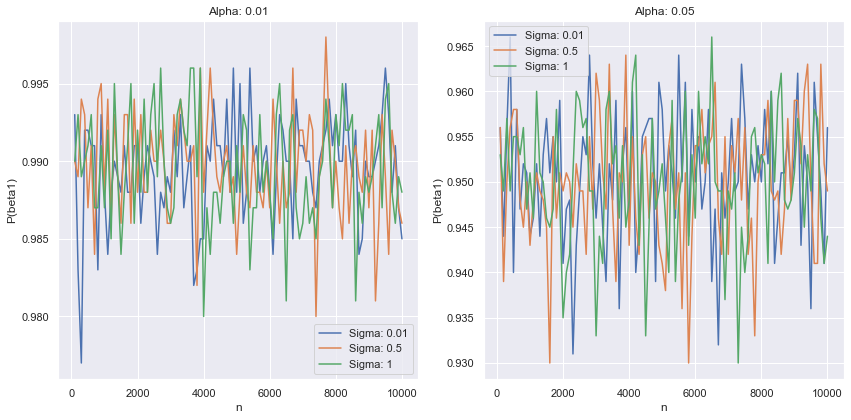

In [ ]:
fig, axs = plt.subplots(1, len(alpha_list), figsize=(12, 6))

for i, alpha in enumerate(alpha_list):
    ax = axs[i]
    for sigma in sigma_list:
        ax.plot(n_list, results2[alpha][sigma]["p_right"], label=f"Sigma: {sigma}")
    ax.set_title(f"Alpha: {alpha}")
    ax.set_xlabel("n")
    ax.set_ylabel("P(beta1)")
    ax.legend()

plt.tight_layout()
plt.show()


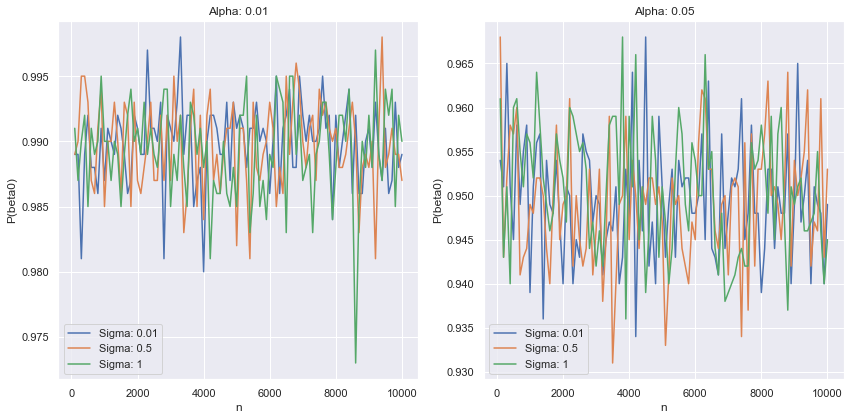

In [ ]:
fig, axs = plt.subplots(1, len(alpha_list), figsize=(12, 6))

for i, alpha in enumerate(alpha_list):
    ax = axs[i]
    for sigma in sigma_list:
        ax.plot(n_list, results2[alpha][sigma]["p_left"], label=f"Sigma: {sigma}")
    ax.set_title(f"Alpha: {alpha}")
    ax.set_xlabel("n")
    ax.set_ylabel("P(beta0)")
    ax.legend()

plt.tight_layout()
plt.show()


# Zad 3

## znanej $\sigma$


In [ ]:
alpha=0.05
b0=2
b1=4
sigma=1
n=np.arange(100,2100,100)
gamma=0.5

In [ ]:
columns=[]

In [ ]:
for n_i in n:
    x_i=np.linspace(0,10,n_i)
    y_i=b0+b1*x_i + np.random.normal(0,sigma,n_i)
    b1_hat=(np.sum((x_i-np.mean(x_i))*(y_i-np.mean(y_i))))/(np.sum((x_i-np.mean(x_i))**2))
    b0_hat=np.mean(y_i)-b1_hat*np.mean(x_i)
    
    x0=np.mean(x_i)+gamma
    mu_x0=b0+b1*x0
    mu_hat=b0_hat+b1_hat*x0 #czy tutaj sie dodaje epsilona (np.random.normal nie wiem)
    
    normal_prob=stats.norm.ppf(1-alpha/2)
    

    a=mu_hat-normal_prob*sigma*np.sqrt((1/n_i)+((x0-np.mean(x_i))**2)/(np.sum((x_i-np.mean(x_i))**2)))
    b=mu_hat+normal_prob*sigma*np.sqrt((1/n_i)+((x0-np.mean(x_i))**2)/(np.sum((x_i-np.mean(x_i))**2)))

    if (a <= mu_x0 <= b):
        columns.append({'n':n_i,'mu_y_x0':mu_x0,'a':a,'b':b,'mu_y_x0 nalezy?': True})
    else:
        columns.append({'n':n_i,'mu_y_x0':mu_x0,'a':a,'b':b,'mu_y_x0 nalezy?': False})

In [ ]:
df=pd.DataFrame(columns)

In [ ]:
df

,n,mu_y_x0,a,b,mu_y_x0 nalezy?
0,100,24.0,23.857635,24.255349,True
1,200,24.0,23.746632,24.027899,True
2,300,24.0,23.952534,24.182199,True
3,400,24.0,24.014041,24.212941,False
4,500,24.0,23.932281,24.110185,True
5,600,24.0,23.920477,24.082882,True
6,700,24.0,23.935798,24.086157,True
7,800,24.0,23.909623,24.050272,True
8,900,24.0,23.928433,24.061038,True
9,1000,24.0,23.882414,24.008215,True


In [ ]:
prawdopo=[]
for n_i in n:
    count=0
    for i in range(1000):
        x_i=np.linspace(0,10,n_i)
        y_i=b0+b1*x_i + np.random.normal(0,sigma,n_i)
        b1_hat=(np.sum((x_i-np.mean(x_i))*(y_i-np.mean(y_i))))/(np.sum((x_i-np.mean(x_i))**2))
        b0_hat=np.mean(y_i)-b1_hat*np.mean(x_i)
        
        x0=np.mean(x_i)+gamma
        mu_x0=b0+b1*x0
        mu_hat=b0_hat+b1_hat*x0 #czy tutaj sie dodaje epsilona (np.random.normal nie wiem)
        
        normal_prob=stats.norm.ppf(1-alpha/2)
        
        a=mu_hat-normal_prob*sigma*np.sqrt((1/n_i)+((x0-np.mean(x_i))**2)/(np.sum((x_i-np.mean(x_i))**2)))
        b=mu_hat+normal_prob*sigma*np.sqrt((1/n_i)+((x0-np.mean(x_i))**2)/(np.sum((x_i-np.mean(x_i))**2)))

        if (a <= mu_x0 <= b):
            count+=1
    a=count/1000
    prawdopo.append(a)

Text(0.5, 1.0, 'Wykres pudełkowy estymatora parametru 1 - alpha')

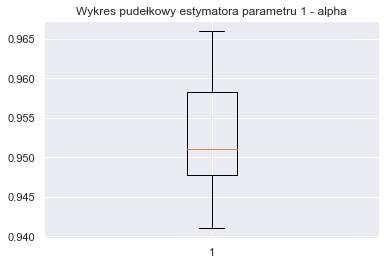

In [ ]:
plt.boxplot(prawdopo)
plt.title("Wykres pudełkowy estymatora parametru 1 - alpha")

## dla nieznanej $\sigma$

In [ ]:
columns2=[]

In [ ]:
for n_i in n:
    x_i=np.linspace(0,10,n_i)
    y_i=b0+b1*x_i + np.random.normal(0,sigma,n_i)
    b1_hat=(np.sum((x_i-np.mean(x_i))*(y_i-np.mean(y_i))))/(np.sum((x_i-np.mean(x_i))**2))
    b0_hat=np.mean(y_i)-b1_hat*np.mean(x_i)
    
    x0=np.mean(x_i)+gamma
    mu_x0=b0+b1*x0
    mu_hat=b0_hat+b1_hat*x0 #czy tutaj sie dodaje epsilona (np.random.normal nie wiem)
    
    y_i_hat=b0_hat+b1_hat*x_i
    s=np.sqrt(np.sum((1/(n_i-2))*(y_i-y_i_hat)**2))
    student_prob=stats.t.ppf(1-alpha/2,n_i-2)
    

    a=mu_hat-student_prob*s*np.sqrt((1/n_i)+(x0-np.mean(x_i))**2/(np.sum((x_i-np.mean(x_i))**2)))
    b=mu_hat+student_prob*s*np.sqrt((1/n_i)+(x0-np.mean(x_i))**2/(np.sum((x_i-np.mean(x_i))**2)))

    if (a <= mu_x0 <= b):
        columns2.append({'n':n_i,'mu_y_x0':mu_x0,'a':a,'b':b,'mu_y_x0 nalezy?': True})
    else:
        columns2.append({'n':n_i,'mu_y_x0':mu_x0,'a':a,'b':b,'mu_y_x0 nalezy?': False})

In [ ]:
df2=pd.DataFrame(columns2)

In [ ]:
df2

,n,mu_y_x0,a,b,mu_y_x0 nalezy?
0,100,24.0,23.802969,24.190087,True
1,200,24.0,23.931358,24.228615,True
2,300,24.0,23.911277,24.147767,True
3,400,24.0,23.875452,24.079440,True
4,500,24.0,24.006825,24.173558,False
5,600,24.0,23.916883,24.084343,True
6,700,24.0,23.935483,24.092990,True
7,800,24.0,23.966705,24.096716,True
8,900,24.0,23.869848,24.000608,True
9,1000,24.0,23.908781,24.037549,True


In [ ]:
prawdopo2=[]
for n_i in n:
    count=0
    for i in range(1000):
        x_i=np.linspace(0,10,n_i)
        y_i=b0+b1*x_i + np.random.normal(0,sigma,n_i)
        b1_hat=(np.sum((x_i-np.mean(x_i))*(y_i-np.mean(y_i))))/(np.sum((x_i-np.mean(x_i))**2))
        b0_hat=np.mean(y_i)-b1_hat*np.mean(x_i)
        
        x0=np.mean(x_i)+gamma
        mu_x0=b0+b1*x0
        mu_hat=b0_hat+b1_hat*x0 #czy tutaj sie dodaje epsilona (np.random.normal nie wiem)
        
        y_i_hat=b0_hat+b1_hat*x_i
        s=np.sqrt(np.sum((1/(n_i-2))*(y_i-y_i_hat)**2))
        student_prob=stats.t.ppf(1-alpha/2,n_i-2)
        

        a=mu_hat-student_prob*s*np.sqrt((1/n_i)+(x0-np.mean(x_i))**2/(np.sum((x_i-np.mean(x_i))**2)))
        b=mu_hat+student_prob*s*np.sqrt((1/n_i)+(x0-np.mean(x_i))**2/(np.sum((x_i-np.mean(x_i))**2)))

        if (a <= mu_x0 <= b):
            count+=1
    a=count/1000
    prawdopo2.append(a)

Text(0.5, 1.0, 'Wykres pudełkowy estymatora parametru 1-alpha, nieznana sigma')

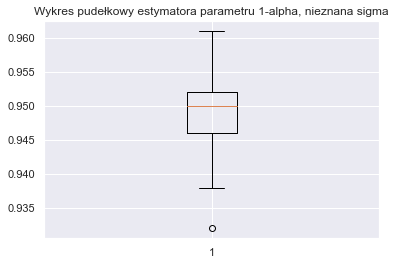

In [ ]:
plt.boxplot(prawdopo2)
plt.title("Wykres pudełkowy estymatora parametru 1-alpha, nieznana sigma")

# Zad 4

## dla znanej

In [ ]:
b0=2
b1=4
sigma=2
alpha=0.05
x=np.linspace(0,10,1000)

In [ ]:
x_i=x[:990]
x0=x[990:]
e0=np.random.normal(0,sigma)
n_i=len(x0)

In [ ]:
y = b0+b1*x + np.random.normal(0,sigma,len(x))
y_i=y[:990]
b1_hat=(np.sum((x_i-np.mean(x_i))*(y_i-np.mean(y_i))))/(np.sum((x_i-np.mean(x_i))**2))
b0_hat=np.mean(y_i)-b1_hat*np.mean(x_i)

In [ ]:
normal_prob=stats.norm.ppf(1-alpha/2)

y_hat_x0=b0_hat+b1_hat*x0
a=y_hat_x0-normal_prob*sigma*np.sqrt(1+(1/n_i)+((x0-np.mean(x_i))**2)/(np.sum((x_i-np.mean(x_i))**2)))
b=y_hat_x0+normal_prob*sigma*np.sqrt(1+(1/n_i)+((x0-np.mean(x_i))**2)/(np.sum((x_i-np.mean(x_i))**2)))

In [ ]:
y_i_rel=b0+b1*x0

c:\Users\jakub\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\jakub\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

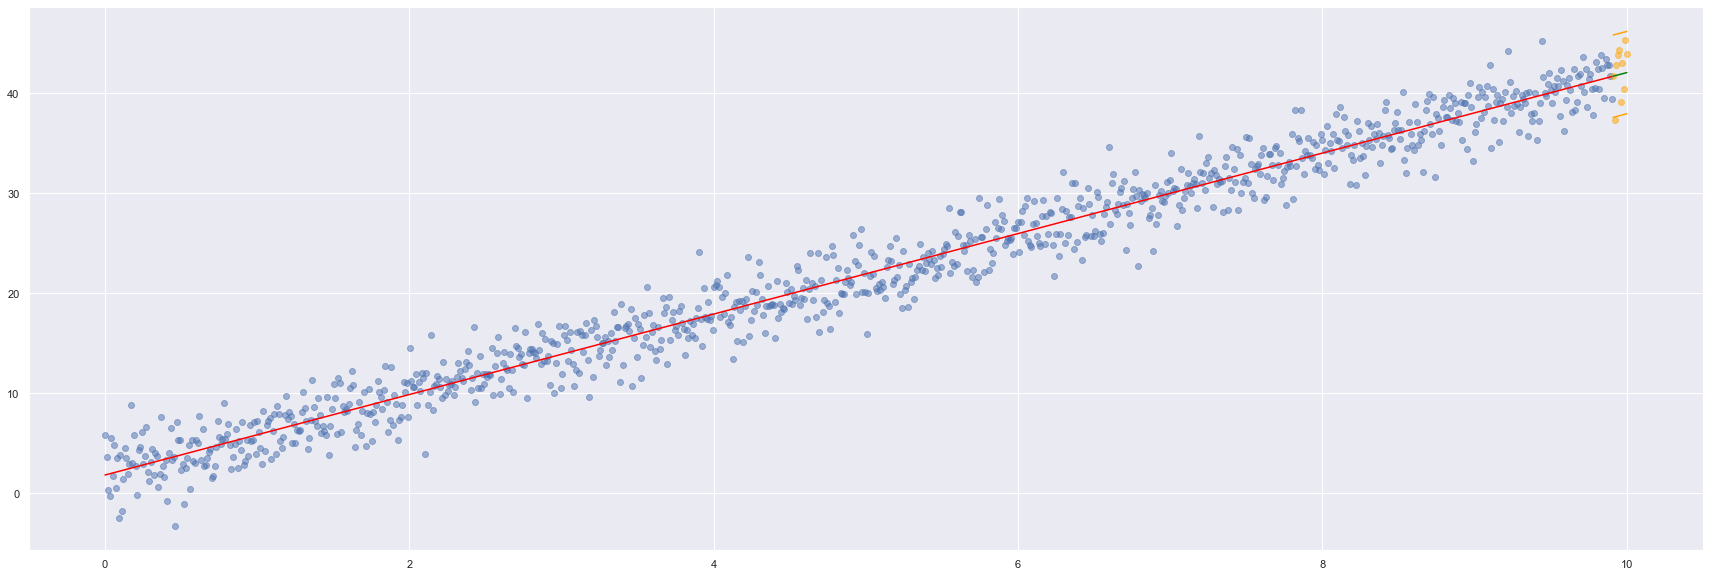

In [ ]:
plt.figure(figsize=(30,10))
plt.scatter(x_i,y_i, alpha=0.5)
plt.scatter(x0,y[990:],alpha=0.5,color='orange')
plt.plot(x_i,b0_hat+b1_hat*x_i, color='red')
plt.plot(x0,b0_hat+b1_hat*x0, color='green')
sns.lineplot(x0,a,color='orange')
sns.lineplot(x0,b,color='orange')

## nieznana

In [4]:
b0=2
b1=4
alpha=0.05
x=np.linspace(0,10,1000)

In [5]:
x_i=x[:990]
x0=x[990:]
e0=np.random.normal(0,sigma)
n_i=len(x_i)

y=b0+b1*x + np.random.normal(0,sigma,len(x))
y_i=b0+b1*x_i + np.random.normal(0,sigma,len(x_i))
b1_hat=(np.sum((x_i-np.mean(x_i))*(y_i-np.mean(y_i))))/(np.sum((x_i-np.mean(x_i))**2))
b0_hat=np.mean(y_i)-b1_hat*np.mean(x_i)
y_i_hat=b0_hat+b1_hat*x_i

s=np.sqrt(np.sum((1/(n_i-2))*(y_i-y_i_hat)**2))
student_prob=stats.t.ppf(1-alpha/2,n_i-2)

y_hat_x0=b0_hat+b1_hat*x0
a=y_hat_x0-student_prob*s*np.sqrt(1+(1/n_i)+((x0-np.mean(x_i))**2)/(np.sum((x_i-np.mean(x_i))**2)))
b=y_hat_x0+student_prob*s*np.sqrt(1+(1/n_i)+((x0-np.mean(x_i))**2)/(np.sum((x_i-np.mean(x_i))**2)))

c:\Users\jakub\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\jakub\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

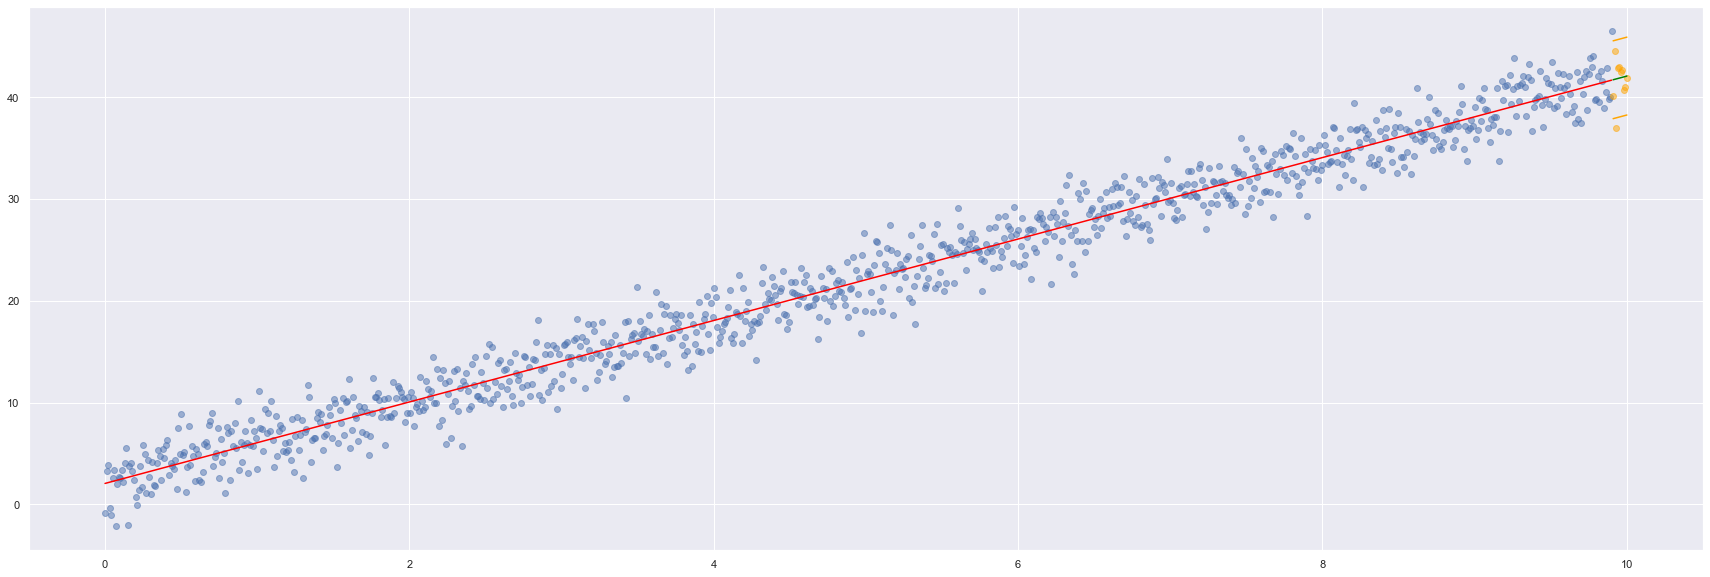

In [ ]:
plt.figure(figsize=(30,10))
plt.scatter(x_i,y_i, alpha=0.5)
plt.scatter(x0,y[990:],alpha=0.5,color='orange')
plt.plot(x_i,b0_hat+b1_hat*x_i, color='red')
plt.plot(x0,b0_hat+b1_hat*x0, color='green')
sns.lineplot(x0,a,color='orange')
sns.lineplot(x0,b,color='orange')